In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('titanic_train.csv')

In [3]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

In [6]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
titanic_df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [9]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [10]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]

In [11]:
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [12]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

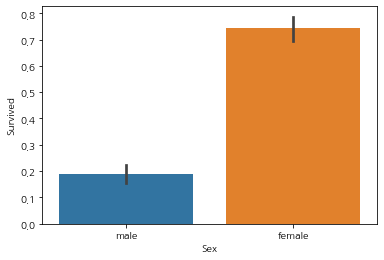

In [13]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

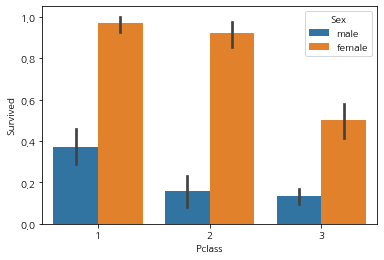

In [14]:
sns.barplot(x='Pclass',y='Survived',data=titanic_df,hue='Sex')

In [15]:
titanic_df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

<AxesSubplot:>

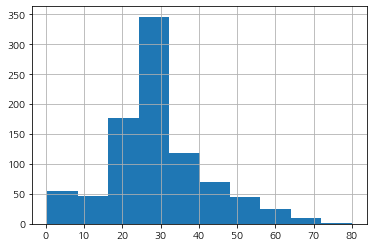

In [16]:
titanic_df['Age'].hist()

In [17]:
def get_category(age):
    cat=''
    if age <= -1:cat='Unknown'
    elif age <= 5:cat='Baby'
    elif age <= 12:cat='Child'
    elif age <= 18:cat='Teenager'
    elif age <= 25:cat='Student'
    elif age <= 35:cat='Young Adult'
    elif age <= 60:cat='Adult'
    else:cat='Elderly'
    return cat

In [18]:
get_category(20.7)

'Student'

In [19]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))

In [20]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult


<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

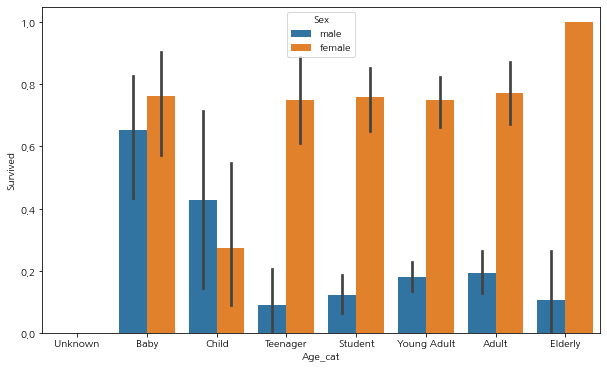

In [21]:
plt.figure(figsize=(10,6))
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
sns.barplot(x='Age_cat',y='Survived',data=titanic_df,hue='Sex',order=group_names)

In [22]:
titanic_df.drop(columns=['Age_cat'],inplace=True)

In [23]:
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,S


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
def encode_features(dataDF):
    from sklearn.preprocessing import LabelEncoder
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        dataDF[feature] = le.fit_transform(dataDF[feature])
        print(le.classes_)
    return dataDF        

In [26]:
encode_features(titanic_df)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['female' 'male']
['C' 'N' 'Q' 'S']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,7,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0


In [27]:
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,7,3


In [28]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
    return df
def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[0]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        dataDF[feature] = le.fit_transform(dataDF[feature])
        print(le.classes_)
    return dataDF 
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df       